### **Deep generative models** 
Code data processing and support vector machine from NICE and VAE losses

Or Shalom & Yochai Israelashvili

In [3]:
# Import packages
import pandas as pd
import numpy as np
import torch
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# Imports specific things from the packages
from sklearn import svm
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc



In [2]:
 # Connects to Drive to call data
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
# Change Directory
%cd "/content/drive/My Drive/DGM/SVM"


/content/drive/My Drive/DGM/SVM


In [6]:
# load the data

# NICE
data_T_svhn_NICE = open("test_loss_per_batch_svhn_NICE.txt", "r")
data_T_cifar10_NICE = open("test_loss_per_batch_cifar10_NICE.txt", "r")
data_T_mnist_NICE = open("test_loss_per_batch_mnist_NICE.txt", "r")
data_T_fashion_mnist_NICE = open("test_loss_per_batch_fashion_mnist_NICE.txt", "r")

# VAE
data_T_svhn_VAE = open("test_loss_per_batch_svhn_VAE.txt", "r")
data_T_cifar10_VAE = open("test_loss_per_batch_cifar10_VAE.txt", "r")
data_T_mnist_VAE = open("test_loss_per_batch_MNIST_VAE.txt", "r")
data_T_fashion_mnist_VAE = open("test_loss_per_batch_FASHION_MNIST_VAE-2.txt", "r")


**Extract and clean the data to a list format**

*NICE*:

In [7]:
# for data_T_svhn_NICE # will be 73257 items
tmp= data_T_svhn_NICE

lines_list=tmp.readlines()
tmp=[]
for line in lines_list:
  tmp.append(line)
tmp2=[]
for ii in range(line.count('t')):
  tmp2.append(float(re.sub("[^0-9^.]", "", line.split()[ii])))


svhn_NICE=tmp2

In [8]:
# for data_T_cifar10_NICE # will be 10000 items
tmp= data_T_cifar10_NICE

lines_list=tmp.readlines()
tmp=[]
for line in lines_list:
  tmp.append(line)
tmp2=[]
for ii in range(line.count('t')):
  tmp2.append(float(re.sub("[^0-9^.]", "", line.split()[ii])))


cifar10_NICE=tmp2

In [9]:
# for data_T_mnist_NICE # will be 10000 items
f = data_T_mnist_NICE
f=(f.read().split())
f[0]=float(f[0][1:-1]) # start with "[" end with ","
for ii in range (1,len(f)): # end with "," and last one end with "]"
  f[ii]=float(f[ii][:-1])
mnist_NICE=f


In [10]:
# for data_T_fashion_mnist_NICE # will be 10000 items
f = data_T_fashion_mnist_NICE
f=(f.read().split())
f[0]=float(f[0][1:-1]) # start with "[" end with ","
for ii in range (1,len(f)): # end with "," and last one end with "]"
  f[ii]=float(f[ii][:-1])
fashion_mnist_NICE=f

*VAE:*

In [11]:
# for data_T_cifar10_VAE # will be 10000 items

f = data_T_cifar10_VAE
f=(f.read().split())
f[0]=float(f[0][1:-1]) # start with "[" end with ","
for ii in range (1,len(f)): # end with "," and last one end with "]"
  f[ii]=float(f[ii][:-1])
cifar10_VAE=f

In [12]:
# for data_T_svhn_VAE # will be 73257 items

f = data_T_svhn_VAE
f=(f.read().split())
f[0]=float(f[0][1:-1]) # start with "[" end with ","
for ii in range (1,len(f)): # end with "," and last one end with "]"
  f[ii]=float(f[ii][:-1])
svhn_VAE=f

In [13]:
# for data_T_mnist_VAE # will be 10000 items

f = data_T_mnist_VAE
f=(f.read().split())
f[0]=float(f[0][1:-1]) # start with "[" end with ","
for ii in range (1,len(f)): # end with "," and last one end with "]"
  f[ii]=float(f[ii][:-1])
mnist_VAE=f

In [14]:
# for data_T_fashion_mnist_VAE # will be 10000 items

f = data_T_fashion_mnist_VAE
f=(f.read().split())
f[0]=float(f[0][1:-1]) # start with "[" end with ","
for ii in range (1,len(f)): # end with "," and last one end with "]"
  f[ii]=float(f[ii][:-1])
fashion_mnist_VAE=f

**Create data frames:**

In [15]:
# creat DF of mnist
d_mnist = {'mnist_NICE':mnist_NICE,'mnist_VAE':mnist_VAE}

d_mnist=pd.DataFrame(d_mnist)
tmp_mnist=d_mnist

# creat DF of fashion_mnist
d_fashion_mnist = {'fashion_mnist_NICE':fashion_mnist_NICE,'fashion_mnist_VAE':fashion_mnist_VAE}

d_fashion_mnist=pd.DataFrame(d_fashion_mnist)
tmp_fashion_mnist=d_fashion_mnist
#DF 2mnist
tmp_mnist.rename(columns = {'mnist_NICE':'NICE', 'mnist_VAE':'VAE'}, inplace = True)
tmp_fashion_mnist.rename(columns = {'fashion_mnist_NICE':'NICE', 'fashion_mnist_VAE':'VAE'}, inplace = True)

tmp_mnist['dataset']='mnist'
tmp_fashion_mnist['dataset']='fashion_mnist'

frames = [tmp_mnist, tmp_fashion_mnist]

df_2mnist = pd.concat(frames) 

In [19]:
# creat DF of cifar10
d_cifar10 = {'cifar10_NICE':cifar10_NICE,'cifar10_VAE':cifar10_VAE}

d_cifar10=pd.DataFrame(d_cifar10)
tmp_cifar10=d_cifar10

# creat DF of svhn
d_svhn = {'svhn_NICE':svhn_NICE,'svhn_VAE':svhn_VAE}

d_svhn=pd.DataFrame(d_svhn)
tmp_svhn=d_svhn
#DF C_and_S
tmp_cifar10.rename(columns = {'cifar10_NICE':'NICE', 'cifar10_VAE':'VAE'}, inplace = True)
tmp_svhn.rename(columns = {'svhn_NICE':'NICE', 'svhn_VAE':'VAE'}, inplace = True)

tmp_cifar10['dataset']='cifar10'
tmp_svhn['dataset']='svhn'

frames = [tmp_cifar10, tmp_svhn]

df_C_and_S = pd.concat(frames)


In [ ]:
# creat DF for just NICE and DF for just VAE
# * Not contain SVHN because ןts dimensions are not the same size as the rest 

# creat DF of NICE
d_NICE = {'cifar10_NICE':cifar10_NICE,#'svhn_NICE':svhn_NICE,
          'mnist_NICE':mnist_NICE,'fashion_mnist_NICE':fashion_mnist_NICE}

d_NICE=pd.DataFrame(d_NICE)

# creat DF of VAE
d_vae = {'cifar10_VAE':cifar10_VAE,#'svhn_VAE':svhn_VAE,
          'mnist_VAE':mnist_VAE,'fashion_mnist_VAE':fashion_mnist_VAE}

d_vae=pd.DataFrame(d_vae)


#### **Visualize the data:**

Text(0, 0.5, 'VAE: test loss per image')

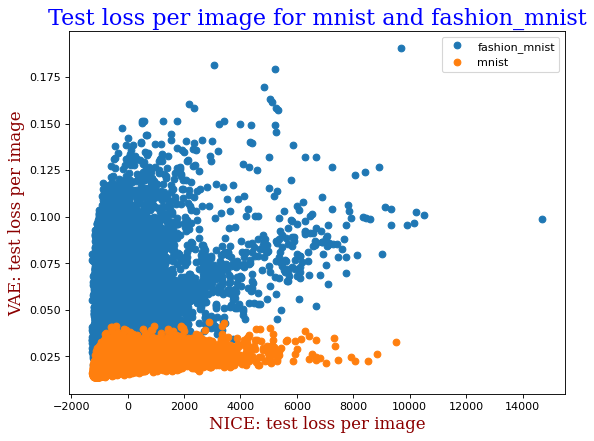

In [17]:
figure(figsize=(8, 6), dpi=80)

groups = df_2mnist.groupby('dataset')
for name, group in groups:
    plt.plot(group.NICE, group.VAE, marker='.', linestyle='', markersize=12, label=name)


font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


plt.title("Test loss per image for mnist and fashion_mnist", fontdict = font1)
plt.legend()
plt.xlabel("NICE: test loss per image", fontdict = font2)
plt.ylabel("VAE: test loss per image", fontdict = font2)


In [18]:
df_2mnist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)


,NICE,VAE,dataset
min,-1277.53,0.01,fashion_mnist
max,14699.20,0.19,mnist
mean,-227.64,0.04,NaN
std,1137.94,0.03,NaN


Text(0, 0.5, 'VAE: test loss per image')

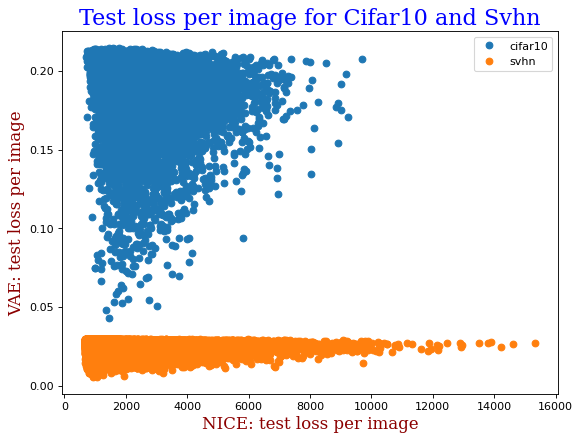

In [20]:
figure(figsize=(8, 6), dpi=80)

groups = df_C_and_S.groupby('dataset')
for name, group in groups:
    plt.plot(group.NICE, group.VAE, marker='.', linestyle='', markersize=12, label=name)


font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


plt.title("Test loss per image for Cifar10 and Svhn", fontdict = font1)
plt.legend()
plt.xlabel("NICE: test loss per image", fontdict = font2)
plt.ylabel("VAE: test loss per image", fontdict = font2)


In [21]:
df_C_and_S.agg(['min', 'max', 'mean', 'std']).round(decimals=2)


,NICE,VAE,dataset
min,655.65,0.01,cifar10
max,15343.41,0.21,svhn
mean,1776.22,0.05,NaN
std,1109.65,0.05,NaN


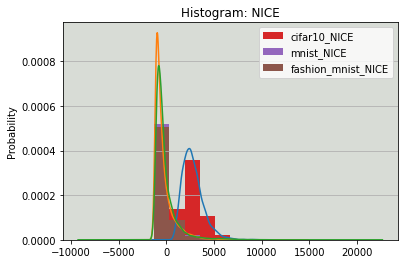

In [23]:
fig, ax = plt.subplots()
d_NICE.plot.kde(ax=ax, legend=False, title='Histogram: NICE')
d_NICE.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

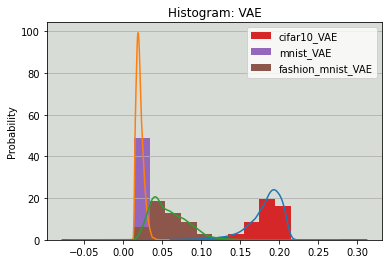

In [24]:
fig, ax = plt.subplots()
d_vae.plot.kde(ax=ax, legend=False, title='Histogram: VAE')
d_vae.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

# **SVM 1 for CIFAR10 and SVHN**

In [41]:
# split to train and test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_C_and_S[['NICE','VAE']],df_C_and_S[['dataset']], test_size=0.30, random_state=42)

In [42]:
#Create a svm Classifier
clf_1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_1.fit(X_train_1, y_train_1)

#Predict the response for test dataset
y_pred_1 = clf_1.predict(X_test_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision(svhn):",metrics.precision_score(y_test_1, y_pred_1,pos_label='svhn'))
print("Precision(cifar10):",metrics.precision_score(y_test_1, y_pred_1,pos_label='cifar10'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall(svhn):",metrics.recall_score(y_test_1, y_pred_1,pos_label='svhn'))
print("Recall(cifar10):",metrics.recall_score(y_test_1, y_pred_1,pos_label='cifar10'))

Accuracy: 0.9961566178236848
Precision(svhn): 0.995656108597285
Precision(cifar10): 1.0
Recall(svhn): 1.0
Recall(cifar10): 0.9677202420981843


In [48]:
print(classification_report(y_test_1, y_pred_1))


              precision    recall  f1-score   support

     cifar10       1.00      0.97      0.98      2974
        svhn       1.00      1.00      1.00     22004

    accuracy                           1.00     24978
   macro avg       1.00      0.98      0.99     24978
weighted avg       1.00      1.00      1.00     24978



Confusion matrix, without normalization
[[ 2878    96]
 [    0 22004]]
Normalized confusion matrix
[[0.96772024 0.03227976]
 [0.         1.        ]]


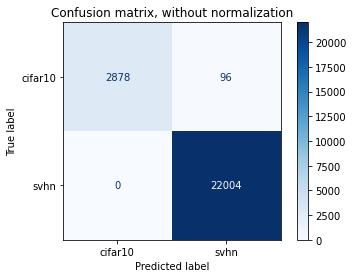

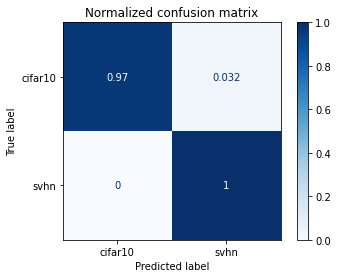

In [49]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_1,
        X_test_1,
        y_test_1,
        display_labels=['cifar10','svhn'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# **SVM 2 for MNIST and FASHION_MNIST**


In [50]:
# split to train and test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2mnist[['NICE','VAE']],df_2mnist[['dataset']], test_size=0.30, random_state=42)

In [ ]:
#Create a svm Classifier
clf_2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_2.fit(X_train_2, y_train_2)

#Predict the response for test dataset
y_pred_2 = clf_2.predict(X_test_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision(mnist):",metrics.precision_score(y_test_2, y_pred_2,pos_label='mnist'))
print("Precision(fashion_mnist):",metrics.precision_score(y_test_2, y_pred_2,pos_label='fashion_mnist'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall(mnist):",metrics.recall_score(y_test_2, y_pred_2,pos_label='mnist'))
print("Recall(fashion_mnist):",metrics.recall_score(y_test_2, y_pred_2,pos_label='fashion_mnist'))

In [ ]:
print(classification_report(y_test_2, y_pred_2))
